In [2]:
import pandas as pd 
import numpy as np 

In [3]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

a. Compute and display the number of classes.

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(np.unique(y_train))

10

(60000, 28, 28)

b. Compute and display the dimensions of each image. 

In [7]:
x_train[0].shape

(28, 28)

In [10]:
x_train.shape

(60000, 28, 28)

In [12]:
# displaying image 
def show (x_train,y_train,i):
    plt.figure(figsize=(3,3))
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])

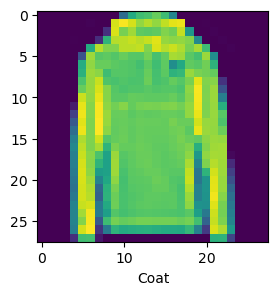

In [13]:
show(x_train,y_train,24)

d. Perform normalization

In [14]:
x_train=x_train/255

In [15]:
x_train.max()

1.0

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import layers

In [14]:
x_train.shape

(60000, 28, 28)

In [125]:
fcnn=Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(2500,activation='relu'),
    Dense(1000,activation='relu'),
    Dense(200,activation='relu'),
    Dense(10,activation='softmax'),
])

C:\Users\godof\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [131]:
cnn2=Sequential([
    # 32 filters size 3 by 3 also (3,3) and just 3 mean the same thing
    # Stride determines how much the filter shifts (or strides) across the input image at each step during the convolution operation.
    # In a 2D convolutional operation, the stride is a 2D parameter because it specifies the movement in both the height and width dimensions of the input volume
    layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(28,28,1),strides=(1,1),padding='valid'),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1),strides=(1,1),padding='valid'),
    layers.MaxPooling2D((2,2),strides =2 ),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [133]:
cnn1 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28,1),strides=(1,1),padding='valid'),
    layers.MaxPooling2D((2,2),strides =2 ),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [135]:
# Use categorical_crossentropy for one-hot encoded labels.
# Use sparse_categorical_crossentropy for integer-encoded labels.
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [137]:
cnn2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [139]:
history=cnn.fit(x_train,y_train,epochs=8)

Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.9884 - loss: 0.0327
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9906 - loss: 0.0268
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9915 - loss: 0.0268
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9918 - loss: 0.0239
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9902 - loss: 0.0251
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9932 - loss: 0.0196
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9915 - loss: 0.0238
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9937 - loss: 0.0175


In [140]:
history2=cnn2.fit(x_train,y_train,epochs=8)

Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 0.8090 - loss: 0.5294
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9061 - loss: 0.2572
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9268 - loss: 0.1965
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9399 - loss: 0.1623
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9543 - loss: 0.1235
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9647 - loss: 0.0956
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9728 - loss: 0.0735
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9776 - loss: 0.0591


In [142]:
b=cnn.evaluate(x_test,y_test)
b

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8742 - loss: 239.8384


[233.69692993164062, 0.8726000189781189]

In [143]:
c=cnn2.evaluate(x_test,y_test)
c

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8483 - loss: 94.2104


[95.31623077392578, 0.8482000231742859]

In [144]:
x_test[1].shape

(28, 28)

In [155]:
single_input = np.expand_dims(x_train[33], axis=0)
prediction = np.argmax(cnn.predict(single_input))
print(class_names[prediction])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Shirt


In [157]:
single_input2 = np.expand_dims(x_train[33], axis=0)
prediction2 = np.argmax(cnn2.predict(single_input))
print(class_names[prediction2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Shirt


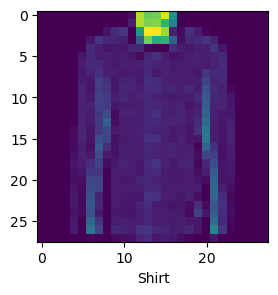

In [159]:
show(x_train,y_train,33)